In [ ]:
import pandas as pd
df = pd.read_csv(r"C:\Users\AROHI SINGH\Downloads\Admission_Predict.csv")
print(df.head())

In [28]:
print(df.shape)

(400, 8)


In [26]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(columns=['Serial No.'], inplace=True)
df.head()

In [35]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [ ]:
X_train

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

In [44]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense 

In [ ]:
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=7,))
model.add(Dense(7, activation='relu', input_dim=7,))
model.add(Dense(1, activation='linear'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

In [65]:
y_pred = model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [66]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.8024121226339478


Text(0.5, 1.0, 'Model Loss')

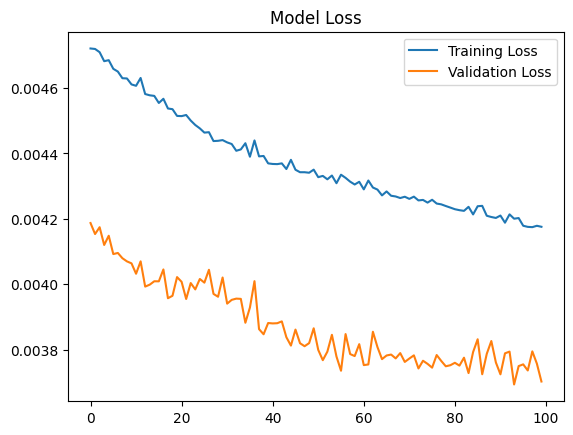

In [70]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Model Loss')